In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
penguins = sns.load_dataset("penguins")

In [4]:
df = pd.DataFrame(data=penguins)
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [5]:
df.columns = ['label', 'island', 'bill length', 'bill depth', 'flipper length', 'body_mass', 'sex']
df

,label,island,bill length,bill depth,flipper length,body_mass,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [6]:
df['label'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

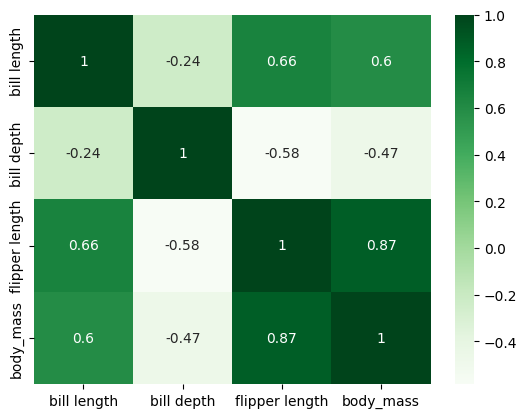

In [7]:
df_numeric = df.select_dtypes(include=[np.number])
matrix = df_numeric.corr()
sns.heatmap(matrix, cmap="Greens", annot=True)
plt.show()

<Axes: xlabel='flipper length', ylabel='body_mass'>

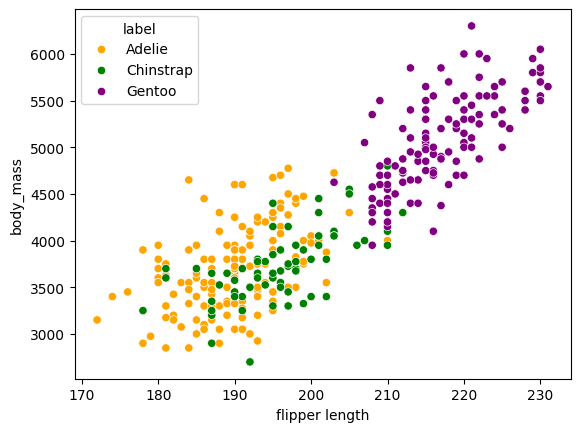

In [8]:
palette = {'Adelie':'orange', 'Chinstrap':'green', 'Gentoo':'purple'}
sns.scatterplot(data=df, x='flipper length', y='body_mass', hue = 'label', palette=palette)

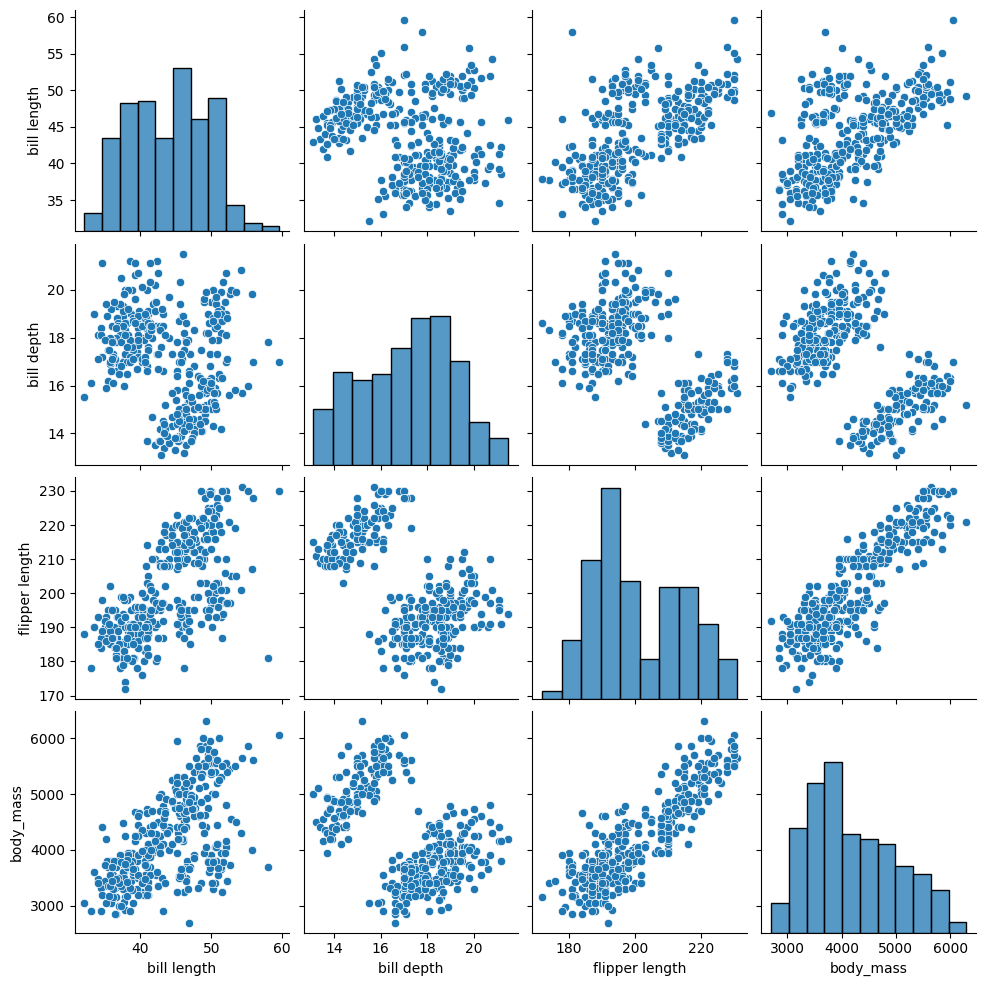

In [9]:
sns.pairplot(data=df, vars=df_numeric)

In [10]:
df.describe()

,bill length,bill depth,flipper length,body_mass
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [11]:
rows_with_nan = df[df.isna().any(axis=1)]
print(rows_with_nan)

      label     island  bill length  bill depth  flipper length  body_mass  \
3    Adelie  Torgersen          NaN         NaN             NaN        NaN   
8    Adelie  Torgersen         34.1        18.1           193.0     3475.0   
9    Adelie  Torgersen         42.0        20.2           190.0     4250.0   
10   Adelie  Torgersen         37.8        17.1           186.0     3300.0   
11   Adelie  Torgersen         37.8        17.3           180.0     3700.0   
47   Adelie      Dream         37.5        18.9           179.0     2975.0   
246  Gentoo     Biscoe         44.5        14.3           216.0     4100.0   
286  Gentoo     Biscoe         46.2        14.4           214.0     4650.0   
324  Gentoo     Biscoe         47.3        13.8           216.0     4725.0   
336  Gentoo     Biscoe         44.5        15.7           217.0     4875.0   
339  Gentoo     Biscoe          NaN         NaN             NaN        NaN   

     sex  
3    NaN  
8    NaN  
9    NaN  
10   NaN  
11   NaN

# Xử lí Missing Values:
Có thể thấy bộ dữ liệu có những giá trị bị miss. Với những cột có giá trị số như "bill length", "bill depth", "flipper length, "body_mass", em sẽ dùng KNN Imputation để điền các vị trí bị khuyết. Thuật toán sẽ tìm K hàng gần nhất dựa trên khoảng cách, sau đó nó sẽ sử dụng các giá trị của các hàng gần nhất này để ước tính và điền giá trị bị thiếu. Dùng KNN để điền các missing values sẽ giữ cho phân phối của các giá trị ổn định, mean và standard không bị thay đổi quá nhiều.

Với những missing values ở cột "sex", em sẽ điền các ô bị khuyết bằng giá trị xuất hiện phổ biến nhất.
![Image](https://substackcdn.com/image/fetch/f_auto,q_auto:good,fl_progressive:steep/https%3A%2F%2Fsubstack-post-media.s3.amazonaws.com%2Fpublic%2Fimages%2F63137c4a-1c5b-44fc-85bf-52a015020b39_2350x810.png)


In [12]:
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [13]:
imputers = {
    'bill length': KNNImputer(n_neighbors=5),
    'bill depth': KNNImputer(n_neighbors=5),
    'flipper length': KNNImputer(n_neighbors=5),
    'body_mass': KNNImputer(n_neighbors=5),
    'sex': SimpleImputer(strategy='most_frequent')
}

# Áp dụng từng imputer cho cột tương ứng
for column, imputer in imputers.items():
    df[[column]] = imputer.fit_transform(df[[column]])

In [14]:
rows_with_nan = df[df.isna().any(axis=1)]
print(rows_with_nan)

Empty DataFrame
Columns: [label, island, bill length, bill depth, flipper length, body_mass, sex]
Index: []


In [15]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Chuyển đổi các cột phân loại
df['label'] = label_encoder.fit_transform(df['label'])
df['sex'] = label_encoder.fit_transform(df['sex'])
df['island'] = label_encoder.fit_transform(df['island'])

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
target = "label"
x = df.drop(target, axis=1)
y = df[target]

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=23521405)

In [25]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=4, random_state=23521405)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=23521405)

In [26]:
from sklearn.metrics import accuracy_score
y_predict = clf.predict(x_test)
print("Accuracy score: {}".format(accuracy_score(y_test, y_predict)))

Accuracy score: 1.0


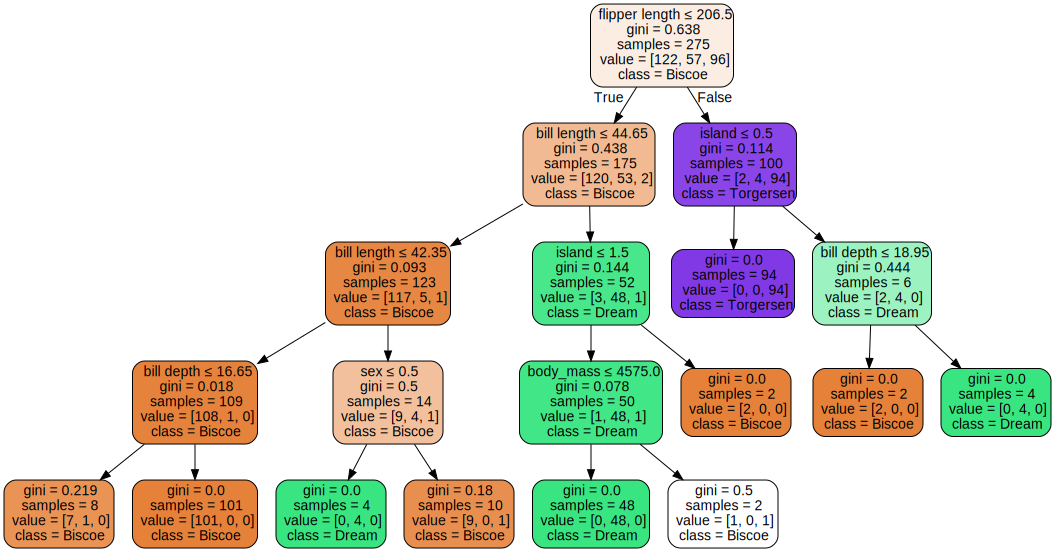

In [27]:
from sklearn.tree import export_graphviz
import graphviz

# Xuất cây dưới dạng dot file
dot_data = export_graphviz(clf,
                           out_file=None,
                           feature_names=['island', 'bill length', 'bill depth', 'flipper length', 'body_mass', 'sex'],  # Tên các đặc trưng
                           class_names=label_encoder.classes_,  # Tên các lớp (label)
                           filled=True,
                           rounded=True,
                           special_characters=True)

# Sử dụng graphviz để trực quan hóa cây
graph = graphviz.Source(dot_data)
graph

# Hyperparameter max_depth:
Khi chỉnh sửa hyperparameter max_depth càng cao, accuracy càng cao (bằng 1). Tuy nhiên đây là bộ test được sinh ra trong cùng bộ dữ liệu nên khả năng model sẽ bị overfitting và không thể dùng trong thực tế khi để max_depth lớn.